# Challenge Set 3<br >
Topic:        Linear Splitting<br >
Date:         07/26/2016<br >
Name:         Seth Kaufman

In [3]:
import pandas as pd
import numpy as np
import datetime
from patsy import dmatrices,dmatrix
import sklearn
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import patsy
import dateutil.parser as dateparser
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

### The model is constant at the mean due to one of the coeficients at  zero

In [4]:
mojo = pd.read_csv('../../../challenges_data/2013_movies.csv', parse_dates=True, infer_datetime_format=[6])
mojo['constant'] = np.ones(len(mojo))
mojo['ReleaseDate'] = mojo['ReleaseDate'].apply(lambda x : dateparser.parse(x).date())

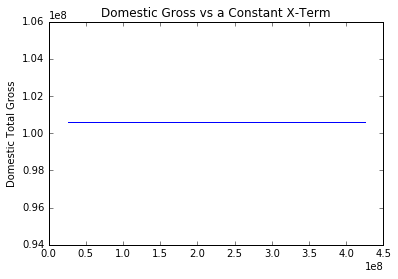

In [6]:
y,X = dmatrices('DomesticTotalGross ~ constant', data = mojo,return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
X_test = dmatrix('np.linspace(0,10,100)',return_type='matrix')
plt.plot(y, clf.predict(X_test))
plt.title('Domestic Gross vs a Constant X-Term')
plt.ylabel('Domestic Total Gross');

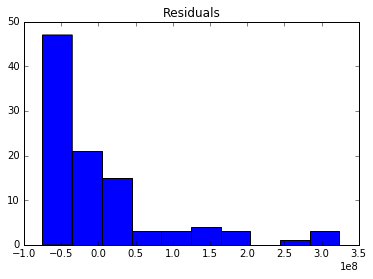

In [7]:
plt.title('Residuals')
plt.hist(y-clf.predict(X_test));

Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

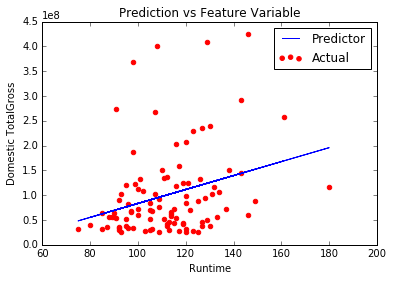

In [35]:
y,X = dmatrices('DomesticTotalGross ~ constant + Runtime', data = mojo,return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,2],clf.predict(X),label='Predictor')
ax.scatter(X[:,2],y,color='r',label='Actual')
ax.set_xlabel('Runtime')
ax.set_ylabel('Domestic TotalGross')
ax.set_title('Prediction vs Feature Variable')
ax.legend();

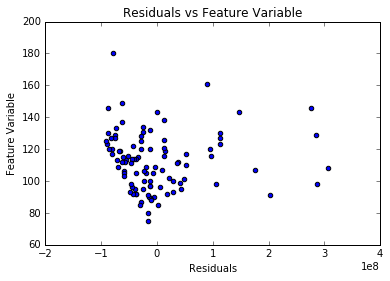

In [39]:
plt.scatter((y-clf.predict(X)),X[:,2])
plt.xlabel('Residuals')
plt.ylabel('Feature Variable')
plt.title('Residuals vs Feature Variable');

Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

### Becoming a better and better predictor

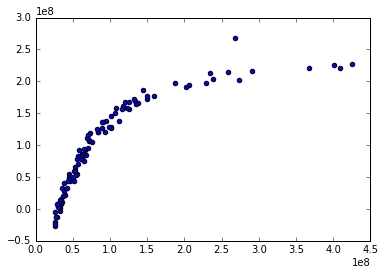

In [42]:
y,X = dmatrices('DomesticTotalGross ~ cont + Runtime + Rating', data = mojo,return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y,clf.predict(X))

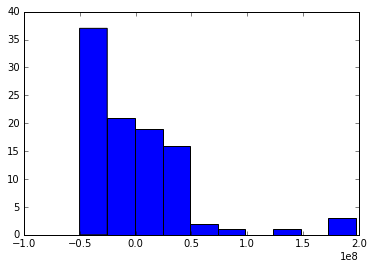

In [186]:
plt.hist(y-clf.predict(X));

Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

### Closer to good regression line

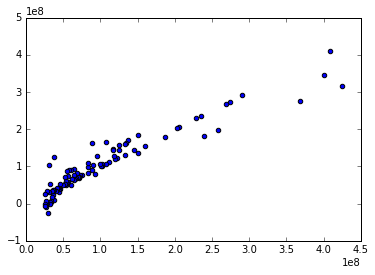

In [188]:
y,X = dmatrices('DomesticTotalGross ~ ReleaseDate + cont + Runtime + Rating', data = mojo,return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y,clf.predict(X))

Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

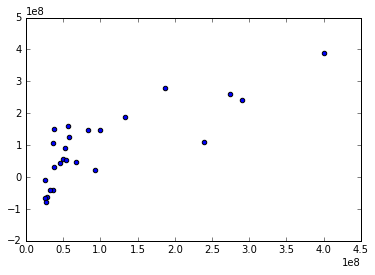

In [195]:
from sklearn.cross_validation import train_test_split

y,X = dmatrices('DomesticTotalGross ~ ReleaseDate + cont + Runtime + Rating', data = mojo,return_type='matrix')
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf.fit(X_train,y_train)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test,clf.predict(X_test));